#過去十年の競馬結果のデータ

In [3]:
import os
import pandas as pd
%cd C:\Users\nohoho1009\PycharmProjects\UM4

feature = pd.read_csv("data/feature.csv", encoding="Shift-JIS")
race_info = pd.read_csv("data/race_info.csv", encoding="Shift-JIS")
race_result = pd.read_csv("data/race_result.csv", encoding="Shift-JIS")

C:\Users\nohoho1009\PycharmProjects\UM4


C:\Users\nohoho1009\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 人気順の的中率
オッズの人気順にそのまま単勝で購入した場合の的中率は以下の通り。
人気1位の単勝購入で約3割、5番手まで含めると大体8割くらいの的中率となるらしい。

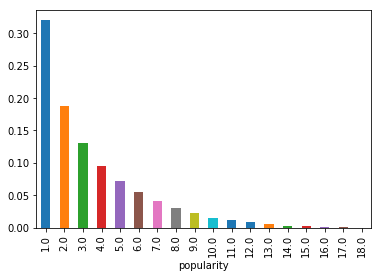

In [6]:
result_1st = race_result[race_result.order_of_finish == "1"]
polularity = result_1st.groupby("popularity").race_id.count()
polularity = polularity / polularity.sum()

polularity.plot.bar()

In [5]:
display(polularity)

popularity
1.0     0.320070
2.0     0.187200
3.0     0.130901
4.0     0.095598
5.0     0.072024
6.0     0.055227
7.0     0.040573
8.0     0.029858
9.0     0.021720
10.0    0.015349
11.0    0.012250
12.0    0.007906
13.0    0.005387
14.0    0.002693
15.0    0.002114
16.0    0.000927
17.0    0.000145
18.0    0.000058
Name: race_id, dtype: float64

## 人気別の払い戻し率
馬の人気別の払い戻し率は下記の通り。
4,5,6,7番人気の払い戻し率が高い模様。

払い戻し率は対象の馬を購入した場合に帰ってくる金額の割合のこと。
1を超えれば利益が出る。

,odds,buyCnt,returnRate
popularity,,,
1.0,26653.7,34496,0.772661
2.0,27378.9,34494,0.793729
3.0,27669.8,34496,0.802116
4.0,28058.4,34497,0.813358
5.0,28438.4,34496,0.824397
6.0,28550.4,34477,0.828100
7.0,28106.8,34431,0.816323
8.0,27992.5,34244,0.817442
9.0,24876.1,33752,0.737026


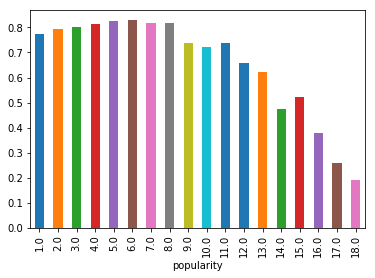

In [12]:
race_result["cnt"] = 1
buyTime = race_result.groupby("popularity").cnt.count()

result_1st = race_result[race_result.order_of_finish == "1"]
payback = result_1st.groupby("popularity").agg({"odds" : "sum"})
payback["buyCnt"] = buyTime
payback["returnRate"] = payback.odds / payback.buyCnt
payback.returnRate.plot.bar()
display(payback)

## スピード係数別の払い戻し率
平均レースタイムとの差をスピード係数として記録し、過去4戦平均スピード係数と過去1戦スピード係数の値毎の払い戻し率を計算する。

スピード係数の算出に関してはcreate_fuature.pyを読んでくれ。元データに無いのは（100MB超えるから）


### 平均スピード係数別の払い戻し率
過去4戦のスピード係数を平均スピード係数（avgSprate4）として払い戻し率を見る。
結果として、平均スピード係数が低い（平均タイムより早い）馬ほど払い戻し率がよいことがわかる。


,odds,buyCnt,returnRate
avgSprate4_int,,,
-18,4.2,3,1.400000
-12,14.7,5,2.940000
-11,4.7,10,0.470000
-10,40.0,19,2.105263
-9,23.2,50,0.464000
-8,25.2,55,0.458182
-7,215.8,146,1.478082
-6,377.1,328,1.149695
-5,699.3,615,1.137073


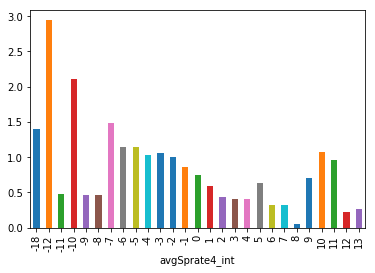

In [13]:
# 前戦のスピード係数と勝率を追加したデータ
feature_u = pd.read_csv("data/feature_update.csv", encoding="Shift-JIS")

# スピード係数を整数に変更（グループ毎に集計したい）
feature_u["avgSprate4_int"] = feature_u.avgSprate4.fillna(0).apply(int)
feature_u["preSprate_int"] = feature_u.preSprate.fillna(0).apply(int)

# 過去4回の平均スピード係数毎の回収率
feature_u["cnt"] = 1
buyTime = feature_u.groupby(["avgSprate4_int"]).cnt.count()

result_1st = feature_u[feature_u.order_of_finish == 1]
payback = result_1st.groupby(["avgSprate4_int"]).agg({"odds": "sum"})
payback["buyCnt"] = buyTime
payback["returnRate"] = payback.odds / payback.buyCnt

payback.returnRate.plot.bar()
display(payback)

ちなみに平均タイムより5秒以上早い馬を買うと払い戻し率は1.14とそこそこの値を叩き出す。
一方で、遅い馬を買うと払い戻し率は0.5を切る。おそらく競馬を買う層はタイムを見てない。
（見てればそんな馬買わないからオッズがあがり、払い戻し率はよくなる）

In [18]:
a = payback.reset_index()
display("平均スピード係数が5秒以上速い馬を買った場合の払い戻し率")
display(a[a.avgSprate4_int < -4].odds.sum() / a[a.avgSprate4_int < -4].buyCnt.sum())

display("平均スピード係数が5秒以上遅い馬を買った場合の払い戻し率")
display(a[a.avgSprate4_int > 4].odds.sum() / a[a.avgSprate4_int > 4].buyCnt.sum())

'平均スピード係数が5秒以上速い馬を買った場合の払い戻し率'

1.1406986190089357

'平均スピード係数が5秒以上遅い馬を買った場合の払い戻し率'

0.496039340776183

### 過去1戦のスピード係数別払い戻し率
過去1戦の場合の結果はややばらついた結果となった。（度数が細かすぎて標本数が足りない場所があるためと思われる）
とはいえ、平均スピード係数と傾向的には似ており、早い馬ほど払い戻し率は高い。


,odds,buyCnt,returnRate
preSprate_int,,,
-22,1.9,6,0.316667
-21,18.6,9,2.066667
-20,20.9,24,0.870833
-19,65.8,33,1.993939
-18,38.1,44,0.865909
-17,69.8,74,0.943243
-16,228.1,109,2.092661
-15,79.1,84,0.941667
-14,21.0,41,0.512195


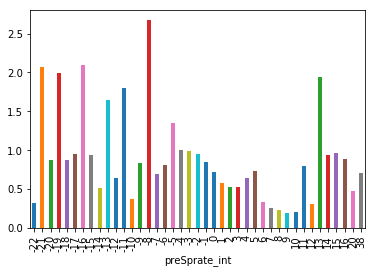

In [19]:
# %%
# 前回の速度レート毎の回収率
feature_u["cnt"] = 1
buyTime = feature_u.groupby(["preSprate_int"]).cnt.count()

result_1st = feature_u[feature_u.order_of_finish == 1]
payback = result_1st.groupby(["preSprate_int"]).agg({"odds": "sum"})
payback["buyCnt"] = buyTime
payback["returnRate"] = payback.odds / payback.buyCnt

display(payback)
payback.returnRate.plot.bar()


平均タイムより5秒以上速い馬を見境なく買うと25%も利益を出せるらしい。
5秒遅い馬の場合は半分になる。
13秒遅い馬だと30%利益がでる。（おそらく超高額馬券が混じってる）

In [22]:
a = payback.reset_index()
display("前戦のスピード係数が5秒以上速い馬を買った場合の払い戻し率")
display(a[a.preSprate_int < -4].odds.sum() / a[a.preSprate_int < -4].buyCnt.sum())

display("前戦のスピード係数が5秒以上遅い馬を買った場合の払い戻し率")
display(a[a.preSprate_int > 4].odds.sum() / a[a.preSprate_int > 4].buyCnt.sum())

display("前戦のスピード係数が13秒以上遅い馬を買った場合の払い戻し率")
display(a[a.preSprate_int > 12].odds.sum() / a[a.preSprate_int > 12].buyCnt.sum())

'前戦のスピード係数が5秒以上速い馬を買った場合の払い戻し率'

1.2421619613670132

'前戦のスピード係数が5秒以上遅い馬を買った場合の払い戻し率'

0.5140295727092793

'前戦のスピード係数が13秒以上遅い馬を買った場合の払い戻し率'

1.3166023166023166

## スピード係数と的中率
スピード係数と比例して的中率もあがっている。
気になる点として前一戦の結果がすごく遅い場合は的中率も高い。
おそらく、馬に負担をかけないために軽く走っている場合があるのかな？



,odds,buyCnt,returnRate
avgSprate4_int,,,
-18,1,3,0.333333
-12,1,5,0.200000
-11,2,10,0.200000
-10,7,19,0.368421
-9,4,50,0.080000
-8,6,55,0.109091
-7,34,146,0.232877
-6,59,328,0.179878
-5,95,615,0.154472


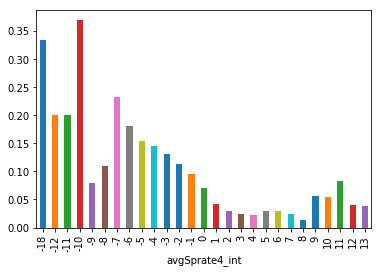

In [23]:
# 過去4回の平均スピード係数毎の回収率
feature_u["cnt"] = 1
buyTime = feature_u.groupby(["avgSprate4_int"]).cnt.count()

result_1st = feature_u[feature_u.order_of_finish == 1]
payback = result_1st.groupby(["avgSprate4_int"]).agg({"odds": "count"})
payback["buyCnt"] = buyTime
payback["returnRate"] = payback.odds / payback.buyCnt

payback.returnRate.plot.bar()
display(payback)

,odds,buyCnt,returnRate
preSprate_int,,,
-22,1,6,0.166667
-21,5,9,0.555556
-20,6,24,0.250000
-19,11,33,0.333333
-18,9,44,0.204545
-17,13,74,0.175676
-16,15,109,0.137615
-15,6,84,0.071429
-14,3,41,0.073171


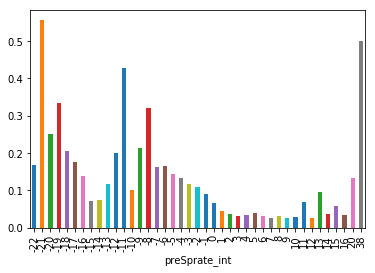

In [24]:
# %%
# 前回の速度レート毎の回収率
feature_u["cnt"] = 1
buyTime = feature_u.groupby(["preSprate_int"]).cnt.count()

result_1st = feature_u[feature_u.order_of_finish == 1]
payback = result_1st.groupby(["preSprate_int"]).agg({"odds": "count"})
payback["buyCnt"] = buyTime
payback["returnRate"] = payback.odds / payback.buyCnt

display(payback)
payback.returnRate.plot.bar()
